In [115]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import math

In [105]:
np.random.seed = 42
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names)
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [107]:
k_range = np.arange(1,100)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [108]:
scores

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 0.9666666666666667,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.0,
 25: 1.0,
 26: 1.0,
 27: 1.0,
 28: 1.0,
 29: 1.0,
 30: 1.0,
 31: 1.0,
 32: 1.0,
 33: 1.0,
 34: 1.0,
 35: 1.0,
 36: 0.9666666666666667,
 37: 1.0,
 38: 0.9666666666666667,
 39: 1.0,
 40: 0.9666666666666667,
 41: 1.0,
 42: 1.0,
 43: 1.0,
 44: 0.9666666666666667,
 45: 1.0,
 46: 0.9666666666666667,
 47: 0.9666666666666667,
 48: 0.9666666666666667,
 49: 0.9666666666666667,
 50: 0.9666666666666667,
 51: 0.9666666666666667,
 52: 0.9666666666666667,
 53: 0.9666666666666667,
 54: 0.9666666666666667,
 55: 0.9666666666666667,
 56: 0.9666666666666667,
 57: 0.9666666666666667,
 58: 0.9666666666666667,
 59: 0.9666666666666667,
 60: 0.9666666666666667,
 61: 0.9666666666666667,
 62: 0.9666666666666667,
 63: 0.9666666666666667,
 64: 0.9666666666666667,
 65: 0.96

Text(0, 0.5, 'accuracy')

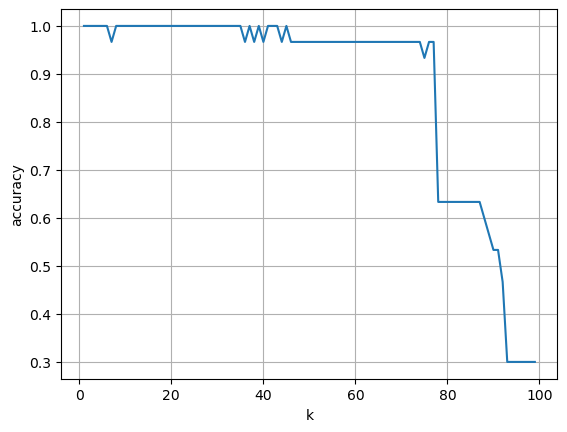

In [109]:
plt.figure()
plt.plot(k_range, scores_list)
plt.grid(True)
plt.xlabel('k')
plt.ylabel('accuracy')

In [121]:
stable_k = math.sqrt(X_train.shape[0])
stable_k

10.954451150103322

In [123]:
best_knn = KNeighborsClassifier(n_neighbors=math.ceil(stable_k))
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

